In [2]:
# Data source: https://unstats.un.org/unsd/snaama/Downloads

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import expon

data_aux = pd.read_csv("./data/GDP_per_capita_US_dollars_2019.csv")
print(data_aux.columns)
data = data_aux['2019'] / 1000.

Index(['CountryID', 'Country', '2019'], dtype='object')


Number of data: 212
Median: 6.52098745
First quartile: 2.18101625
Third quartile: 21.98754875
[178.79945 190.53247]


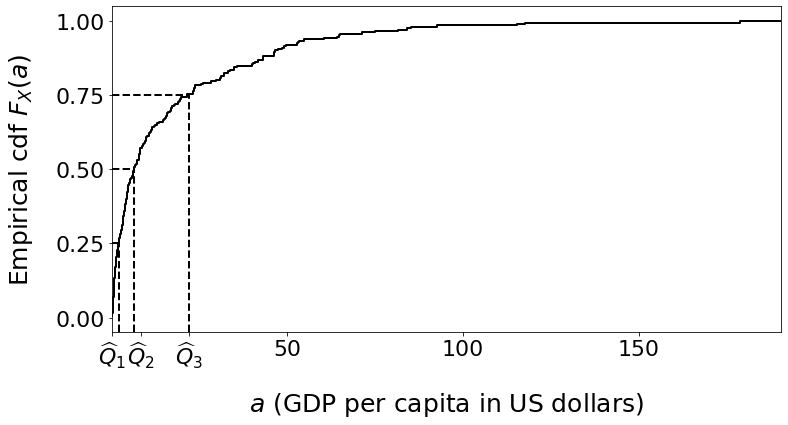

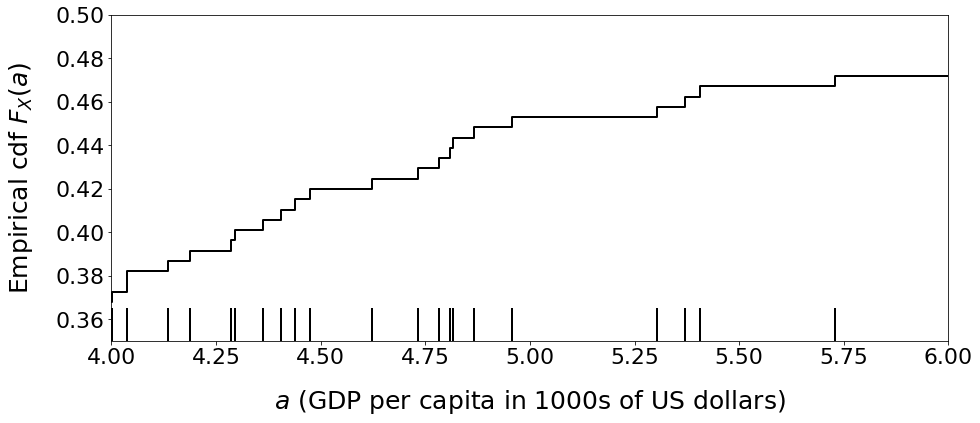

In [12]:
def empirical_cdf(x):
    x_sorted = np.sort(x)
    cdf = np.arange(1, len(x_sorted)+1) / float(len(x_sorted))
    return x_sorted, cdf

sorted_data, cdf = empirical_cdf(data) 

median = np.median(data)
first_quartile = np.percentile(data,25)
third_quartile = np.percentile(data,75)

print("Number of data: " + str(len(data)))
print("Median: " + str(median))
print("First quartile: " + str(first_quartile))
print("Third quartile: " + str(third_quartile))

font_size = 25
font_size_legend = 25
font_size_ticks = 22

x_min = sorted_data[0]
x_max = sorted_data[-1]
print(sorted_data[-2:])
y_min = -0.05
y_max = 1.05
plt.figure(figsize=(12,6))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.step(sorted_data,cdf,linewidth=2,color="black")
plt.hlines(0.25,x_min,first_quartile,linewidth=2,ls='dashed',color="black")
plt.vlines(first_quartile,y_min,0.25,linewidth=2,ls='dashed',color="black")
plt.hlines(0.5,x_min,median,linewidth=2,ls='dashed',color="black")
plt.vlines(median,y_min,0.5,linewidth=2,ls='dashed',color="black")
plt.hlines(0.75,x_min,third_quartile,linewidth=2,ls='dashed',color="black")
plt.vlines(third_quartile,y_min,0.75,linewidth=2,ls='dashed',color="black")
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.xlabel(r'$a$ (GDP per capita in US dollars)',fontsize=font_size,labelpad=20)
plt.ylabel(r'Empirical cdf $F_{X}(a)$',fontsize=font_size,labelpad=20)
plt.xticks([first_quartile-2,median+2,third_quartile,50,100,150],
          labels=["$\widehat{Q}_1$","$\widehat{Q}_2$","$\widehat{Q}_3$",'50','100','150'])
plt.yticks([0,0.25,0.5,0.75,1])
plt.savefig('plots/empirical_cdf_gdp.pdf',bbox_inches="tight")

x_min = 5 - 1
x_max = 5 + 1
y_min = 0.35
y_max = .5
plt.figure(figsize=(15,6))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.step(sorted_data,cdf,linewidth=2,color="black")
sns.rugplot(data,color="black",height=0.1,lw=2)
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.xlabel(r'$a$ (GDP per capita in 1000s of US dollars)',fontsize=font_size,labelpad=20)
plt.ylabel(r'Empirical cdf $F_{X}(a)$',fontsize=font_size,labelpad=20)
plt.savefig('plots/empirical_cdf_gdp_zoom.pdf',bbox_inches="tight")

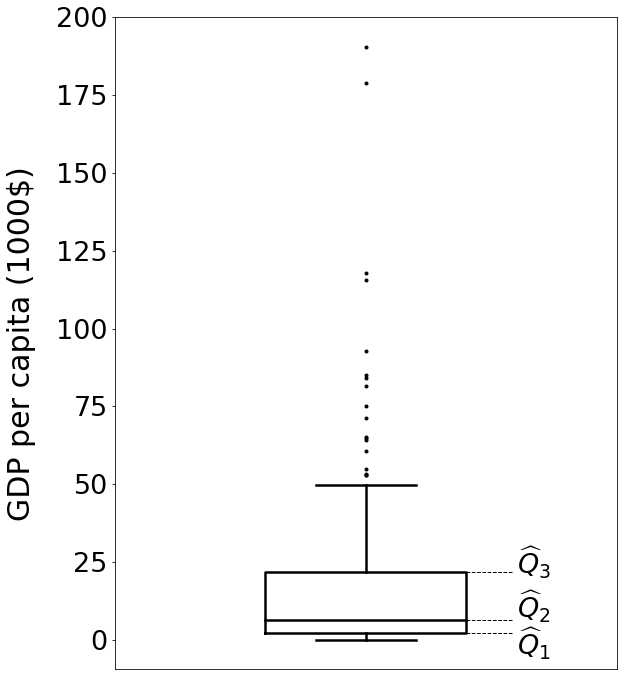

In [16]:
extra_fontsize = 5
plt.figure(figsize=(9,12))
plt.xticks(fontsize=font_size_ticks+extra_fontsize) 
plt.yticks(fontsize=font_size_ticks+extra_fontsize)
# ax = sns.boxplot( data=(stature,stature_men))
dots = dict(markerfacecolor='black', marker='.')
median_props = dict(color='black', lw=2.5)
plt.ylabel('GDP per capita (1000\$)',fontsize=font_size+extra_fontsize,labelpad=20)
ax = plt.boxplot( data,flierprops=dots,medianprops=median_props,whiskerprops=median_props,
                 capprops=median_props,boxprops=median_props,widths=0.4)
plt.hlines(first_quartile,1.2,1.29,linewidth=1,ls='dashed',color="black")
plt.hlines(median,1.2,1.29,linewidth=1,ls='dashed',color="black")
plt.hlines(third_quartile,1.2,1.29,linewidth=1,ls='dashed',color="black")
plt.text(1.3,first_quartile-7,r'$\widehat{Q}_1$',fontsize=font_size_ticks+extra_fontsize)
plt.text(1.3,median+0.5,r'$\widehat{Q}_2$',fontsize=font_size_ticks+extra_fontsize)
plt.text(1.3,third_quartile-1,r'$\widehat{Q}_3$',fontsize=font_size_ticks+extra_fontsize)
plt.xticks([])
plt.savefig('plots/boxplot_gdp.pdf',bbox_inches="tight")

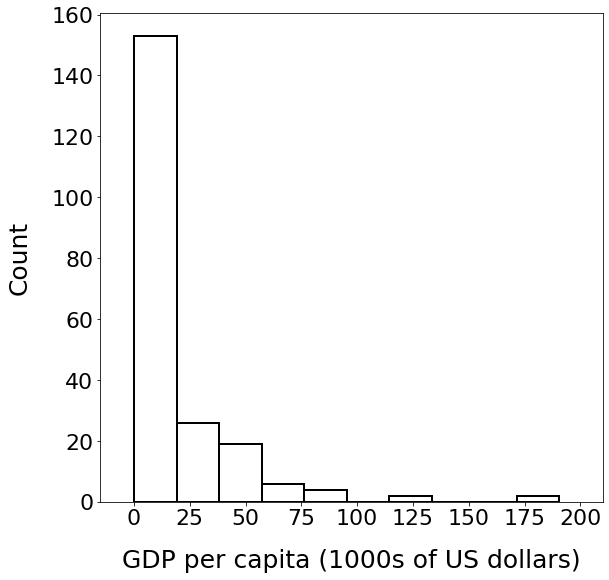

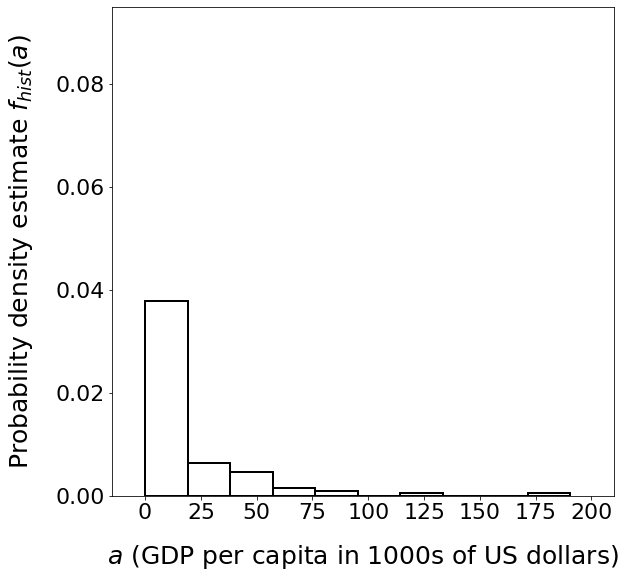

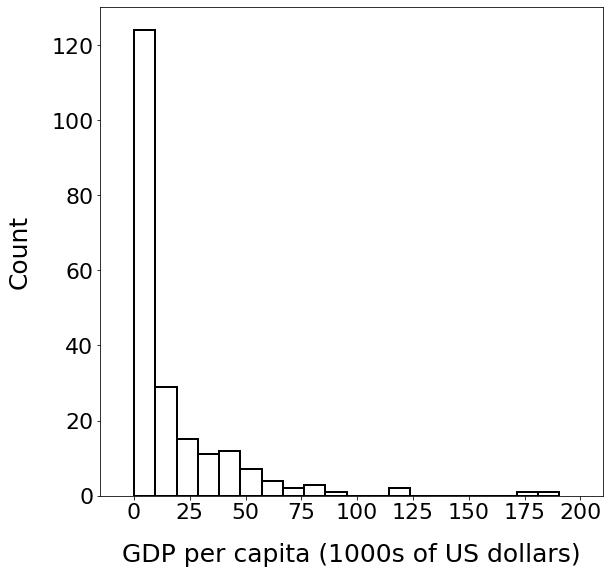

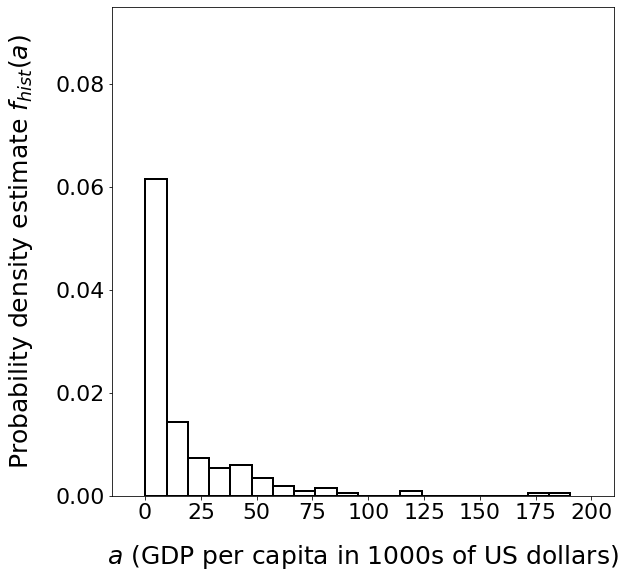

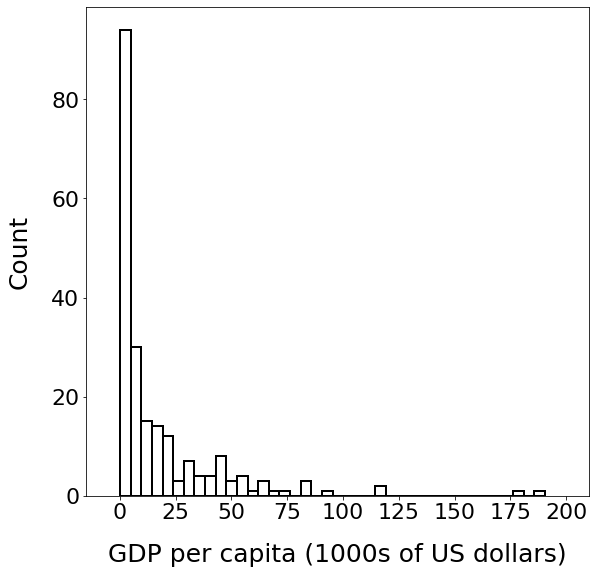

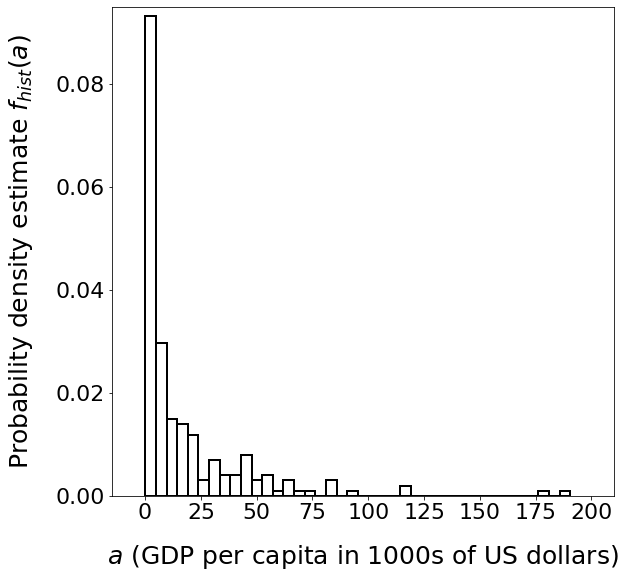

In [11]:
n_bins = [10,20,40]
x_min = -15
x_max = 210
y_max = 0.095

for n in n_bins:

    plt.figure(figsize=(9,9))
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.hist(data,bins=n,color='white', edgecolor='black',
              linewidth=2)
    plt.xlim([x_min,x_max])
    plt.ylabel("Count",fontsize=font_size,labelpad=20)
    plt.xlabel('GDP per capita (1000s of US dollars)',fontsize=font_size,labelpad=20)
    plt.savefig('plots/histogram_gdp' + str(n) + '.pdf',bbox_inches="tight")
    
    plt.figure(figsize=(9,9))
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.hist(data,bins=n,color='white', edgecolor='black',
              linewidth=2,density=True)
    plt.xlim([x_min,x_max])
    plt.ylim([0,y_max])
    plt.ylabel(r"Probability density estimate $f_{hist}(a)$",fontsize=font_size,labelpad=20)
    plt.xlabel(r'$a$ (GDP per capita in 1000s of US dollars)',fontsize=font_size,labelpad=20)
    plt.savefig('plots/histogram_gdp' + str(n) + '_norm.pdf',bbox_inches="tight")

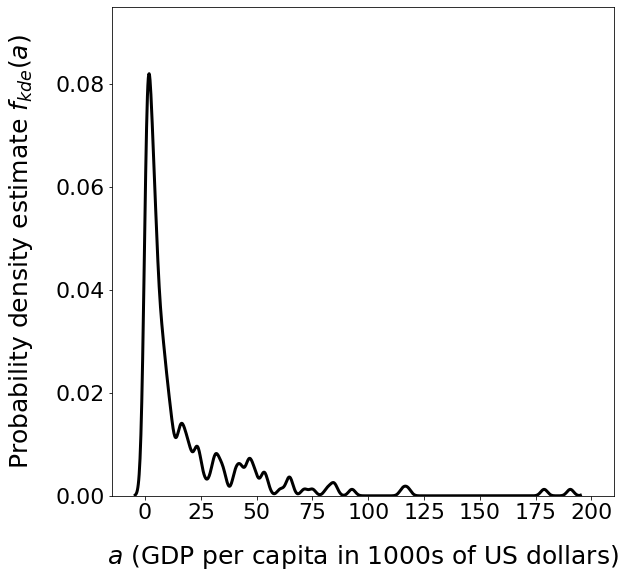

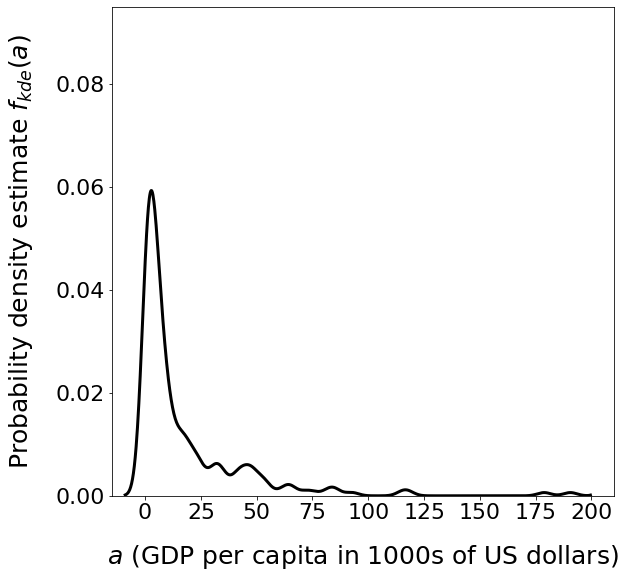

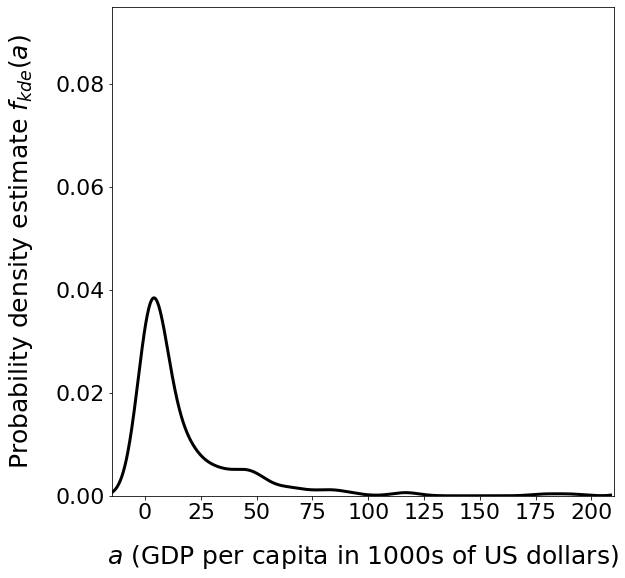

In [10]:
bw_vals = [1.5,3,6]
for index,bw in enumerate(bw_vals):

    plt.figure(figsize=(9,9))
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    sns.kdeplot(data,bw=bw,color="black",lw=3,gridsize=1000, legend = False)#,color='white', edgecolor='black',linewidth=2)
    plt.xlim([x_min,x_max])
    plt.ylim([0,y_max])
    plt.ylabel(r"Probability density estimate $f_{kde}(a)$",fontsize=font_size,labelpad=20)
    plt.xlabel('$a$ (GDP per capita in 1000s of US dollars)',fontsize=font_size,labelpad=20)
    plt.savefig('plots/kde_gdp' + str(index) + '.pdf',bbox_inches="tight")